In [2]:
# Cholla 1D square wave plotting script
import h5py
%pylab inline
pylab.rcParams.update({'font.size': 18})
pylab.rcParams.update({'font.family': 'serif'})
pylab.rcParams.update({'mathtext.default':'regular'})
pylab.rcParams.update({'mathtext.fontset':'stixsans'})
pylab.rcParams.update({'axes.linewidth': 1.5})
pylab.rcParams.update({'xtick.direction':'in'})
pylab.rcParams.update({'xtick.major.size': 5})
pylab.rcParams.update({'xtick.major.width': 1.25 })
pylab.rcParams.update({'xtick.minor.size': 2.5})
pylab.rcParams.update({'xtick.minor.width': 1.25 })
pylab.rcParams.update({'ytick.direction':'in'})
pylab.rcParams.update({'ytick.major.size': 5})
pylab.rcParams.update({'ytick.major.width': 1.25 })
pylab.rcParams.update({'ytick.minor.size': 2.5})
pylab.rcParams.update({'ytick.minor.width': 1.25 })

Populating the interactive namespace from numpy and matplotlib


## Square Wave

## Cholla Input File
```
#
# Parameter File for square wave test
#

################################################
# number of grid cells in the x dimension
nx=100
# number of grid cells in the y dimension
ny=1
# number of grid cells in the z dimension
nz=1
# final output time
tout=1.0
# time interval for output
outstep=0.01
nfull=1
# name of initial conditions
init=Square_Wave
# size of domain
xmin=0.0
ymin=0.0
zmin=0.0
xlen=1.0
ylen=1.0
zlen=1.0
# type of boundary conditions
xl_bcnd=1
xu_bcnd=1
# path to output directory
outdir=./

#################################################
# Parameters for square wave 
# initial density 
rho=1.0
# velocity in the x direction 
vx=1.0
# velocity in the y direction
vy=0
# velocity in the z direction
vz=0
# initial pressure 
P=0.01
# relative amplitude of overdense region 
A=1.5
# value of gamma
gamma=1.666666666666667
```

In [5]:
dnamein = "./test_suite_output/square_wave_output/"
dnameout = "./test_suite_output/square_wave_output/"
i_out = np.arange(0, 101)
DE = 0
for i in i_out:
    f = h5py.File(dnamein + str(i) + ".h5", "r")
    head = f.attrs # Allows dictionary-style access to an HDF5 object's attributes.
    nx = head["dims"][0]
    xrange = np.arange(0, nx + 1)
    gamma = head["gamma"][0]
    d = np.array(f["density"]) # mass density
    mx = np.array(f["momentum_x"]) # x-momentum
    my = np.array(f["momentum_y"]) # y-momentum
    mz = np.array(f["momentum_z"]) # z-momentum
    E = np.array([f["Energy"]]) # total energy density

    vx = mx / d
    vy = my / d
    vz = mz / d

    if DE:
        e  = np.array(f['GasEnergy'])
        p  = e*(gamma-1.0) # pressure
        ge = e/d # internal energy
    else: 
        p  = (E - 0.5*d*(vx*vx + vy*vy + vz*vz)) * (gamma - 1.0) # pressure
        ge  = p/d/(gamma - 1.0) # internal energy
    
    fig = plt.figure(figsize=(7, 7))
    ax1 = plt.axes([0.1, 0.6, 0.35, 0.35])
    ax1.plot(d, 'o', markersize=2, color='black')
    plt.ylabel('Density', fontsize=14)
    ax2 = plt.axes([0.6, 0.6, 0.35, 0.35])
    ax2.plot(vx, 'o', markersize=2, color='black')
    plt.ylabel('Velocity', fontsize=14)
    ax3 = plt.axes([0.1, 0.1, 0.35, 0.35])
    ax3.plot(p[0], 'o', markersize=2, color='black')
    plt.ylabel('Pressure', fontsize=14)
    ax4 = plt.axes([0.6, 0.1, 0.35, 0.35])
    ax4.plot(ge[0], 'o', markersize=2, color='black')
    plt.ylabel('Internal Energy', fontsize=14)
    plt.suptitle(f"Square Wave {i}", y=1.02, fontsize=18)
    plt.savefig(f"{dnameout}/sq_wave_{i}.png")
    # plt.show()
    plt.close('all')

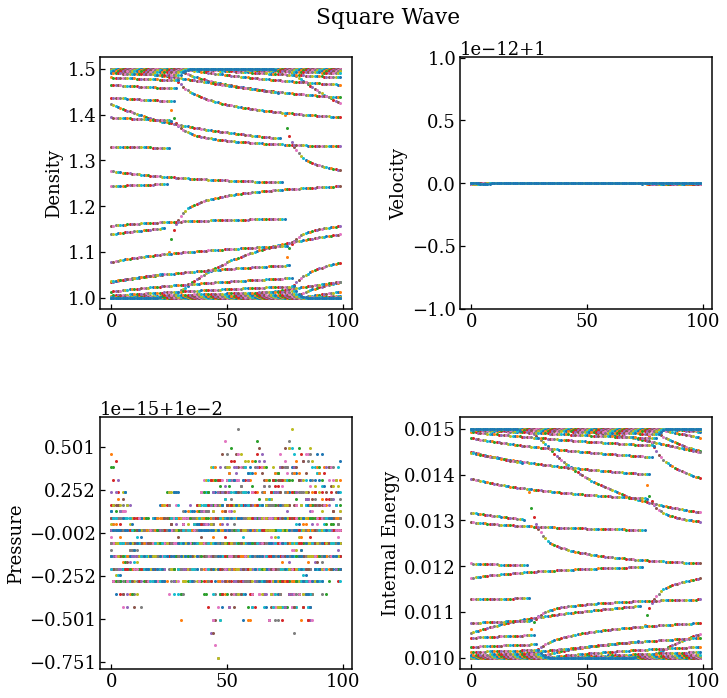

In [7]:
import warnings
warnings.filterwarnings('ignore')

dnamein = "./square_wave_1D/"
dnameout = "./square_wave_1D/"
i_out = np.arange(0, 101)
DE = 0
fig = plt.figure(figsize=(10, 10))
plt.rc('font', size=18)
for i in i_out:
    f = h5py.File(dnamein + str(i) + ".h5", "r")
    head = f.attrs # Allows dictionary-style access to an HDF5 object's attributes.
    nx = head["dims"][0]
    xrange = np.arange(0, nx + 1)
    gamma = head["gamma"][0]
    d = np.array(f["density"]) # mass density
    mx = np.array(f["momentum_x"]) # x-momentum
    my = np.array(f["momentum_y"]) # y-momentum
    mz = np.array(f["momentum_z"]) # z-momentum
    E = np.array([f["Energy"]]) # total energy density

    vx = mx / d
    vy = my / d
    vz = mz / d

    if DE:
        e  = np.array(f['GasEnergy'])
        p  = e*(gamma-1.0) # pressure
        ge = e/d # internal energy
    else: 
        p  = (E - 0.5*d*(vx*vx + vy*vy + vz*vz)) * (gamma - 1.0) # pressure
        ge  = p/d/(gamma - 1.0) # internal energy
    

    ax1 = plt.axes([0.1, 0.6, 0.35, 0.35])
    ax1.plot(d, 'o', markersize=2)
    plt.ylabel('Density')
    ax2 = plt.axes([0.6, 0.6, 0.35, 0.35])
    ax2.plot(vx, 'o', markersize=2)
    plt.ylabel('Velocity')
    ax3 = plt.axes([0.1, 0.1, 0.35, 0.35])
    ax3.plot(p[0], 'o', markersize=2)
    plt.ylabel('Pressure')
    ax4 = plt.axes([0.6, 0.1, 0.35, 0.35])
    ax4.plot(ge[0], 'o', markersize=2)
    plt.ylabel('Internal Energy')

plt.suptitle("Square Wave", y=1.02)
plt.show()